#Importing Libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning-Project.rar (Unzipped Files)/X_Train.csv')
dfy = pd.read_csv('/content/drive/MyDrive/Machine Learning-Project.rar (Unzipped Files)/Y_train.csv')
df['label']=dfy['label']
df = df.mask(df == '?').fillna(df.mean())
df = df.drop(columns=['weight','id','patient_no'] ,axis=1)
df = df.fillna(df.ffill())
df = df.dropna()

In [ ]:
df

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,Caucasian,Female,[80-90),1,1,7,4,MC,Family/GeneralPractice,44,0,15,4,0,0,414,413,250,6,None,Norm,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
1,Caucasian,Female,[80-90),5,3,17,3,MC,Orthopedics-Reconstructive,15,1,20,0,0,0,820,E888,E849,8,>300,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[50-60),3,1,1,1,SP,Cardiology,45,1,18,0,0,1,V53,414,427,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,<30
3,Caucasian,Female,[70-80),5,3,1,3,MC,Cardiology,52,0,14,12,1,0,507,491,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
4,Caucasian,Female,[90-100),1,3,7,5,MC,Cardiology,62,0,12,0,0,2,584,203,416,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,Caucasian,Female,[80-90),2,1,7,2,SP,InternalMedicine,53,3,17,0,0,0,428,425,276,9,None,None,Steady,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30
71232,Caucasian,Male,[60-70),3,1,1,4,BC,InternalMedicine,23,1,8,0,0,0,882,250,272,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
71233,Caucasian,Female,[80-90),2,3,7,6,MC,Pediatrics,70,0,23,0,0,0,584,560,491,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
71234,Caucasian,Female,[80-90),2,6,20,4,MC,Pediatrics,61,1,18,0,0,0,581,250.6,427,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO


In [ ]:
le = LabelEncoder()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = SelectKBest(chi2, k=10).fit_transform(X, y)
X.shape

(71236, 10)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=2)

#Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
rfc = rfc.fit(Xtrain,ytrain)
rfcpred = rfc.predict(Xtest)
accuracy_score(rfcpred,ytest)


0.5861173498034812

In [ ]:
pd.crosstab(ytest, rfcpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
Actual,,,,
0,17,588,990,1595
1,22,1863,3109,4994
2,8,1180,6471,7659
All,47,3631,10570,14248


In [ ]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 9 (0.083917)
2. feature 15 (0.080890)
3. feature 16 (0.079737)
4. feature 17 (0.078021)
5. feature 11 (0.073733)
6. feature 8 (0.055594)
7. feature 6 (0.054096)
8. feature 2 (0.045280)
9. feature 7 (0.043166)
10. feature 14 (0.040959)
11. feature 4 (0.039277)
12. feature 18 (0.037253)
13. feature 10 (0.036108)
14. feature 38 (0.026071)
15. feature 3 (0.025341)
16. feature 5 (0.020052)
17. feature 0 (0.019553)
18. feature 1 (0.018142)
19. feature 12 (0.017857)
20. feature 20 (0.017621)
21. feature 13 (0.014064)
22. feature 21 (0.013593)
23. feature 27 (0.012227)
24. feature 44 (0.011936)
25. feature 28 (0.011176)
26. feature 45 (0.008261)
27. feature 30 (0.008222)
28. feature 31 (0.007396)
29. feature 25 (0.007024)
30. feature 19 (0.006266)
31. feature 22 (0.003069)
32. feature 39 (0.001525)
33. feature 23 (0.001398)
34. feature 32 (0.000676)
35. feature 24 (0.000204)
36. feature 35 (0.000124)
37. feature 33 (0.000104)
38. feature 29 (0.000027)
39. feature 40

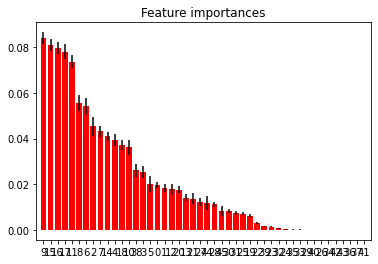

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Logistic Regression

In [ ]:
clf = LogisticRegression(multi_class='multinomial')
clf = clf.fit(Xtrain,ytrain)
Z = clf.predict(Xtest)
accuracy_score(ytest,Z)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5622543514879281

In [ ]:
pd.crosstab(ytest, Z, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
Actual,,,,
0,2,305,1288,1595
1,4,815,4175,4994
2,2,463,7194,7659
All,8,1583,12657,14248


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(Xtrain,ytrain).predict(Xtest)
accuracy_score(nb,ytest)

0.446378439079169

In [ ]:
pd.crosstab(ytest, nb, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
Actual,,,,
0,812,35,748,1595
1,2221,135,2638,4994
2,2129,117,5413,7659
All,5162,287,8799,14248


#Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB().fit(Xtrain,ytrain).predict(Xtest)
accuracy_score(mb,ytest)

0.4571869736103313

In [ ]:
pd.crosstab(ytest, mb, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
Actual,,,,
0,373,543,679,1595
1,858,1905,2231,4994
2,1127,2296,4236,7659
All,2358,4744,7146,14248


#Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
sm = LinearSVC().fit(Xtrain,ytrain).predict(Xtest)
accuracy_score(sm,ytest)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5336889387984278

In [ ]:
pd.crosstab(ytest, sm, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
Actual,,,,
0,0,216,1379,1595
1,1,629,4364,4994
2,0,684,6975,7659
All,1,1529,12718,14248


#Results Prediction

In [ ]:
Xpred = pd.read_csv('/content/drive/MyDrive/Machine Learning-Project.rar (Unzipped Files)/X_test.csv')
Xpred = Xpred.drop(columns=['weight','id','patient_no'], axis=1)
Xpred = Xpred.mask(Xpred == '?').fillna(Xpred.ffill())
Xpred = Xpred.apply(LabelEncoder().fit_transform)
Xpred

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
0,3,1,8,4,2,11,6,0,55,21,1,12,2,0,0,240,216,204,4,3,2,1,1,1,1,1,0,1,2,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1
1,3,0,9,0,2,4,5,7,0,64,0,13,0,0,1,235,219,337,8,2,2,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
2,1,0,5,0,0,6,3,7,19,43,1,15,0,0,1,235,75,206,4,2,2,1,1,1,1,1,0,1,1,0,3,1,0,1,0,0,0,0,2,1,0,0,0,0,0,1
3,1,0,6,0,0,6,4,8,0,36,6,26,0,2,0,224,206,410,8,2,2,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,2,1,0,0,0,0,1,1
4,3,1,2,0,0,6,3,0,18,51,0,12,0,0,3,349,63,106,4,2,2,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,2,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,1,1,7,1,0,6,6,0,18,52,1,9,0,0,6,215,219,214,8,2,2,1,1,1,1,1,0,2,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1
30526,3,1,3,0,0,0,5,6,0,67,0,24,1,0,0,150,300,125,8,2,3,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
30527,3,0,1,2,0,0,5,8,32,60,0,11,5,0,1,83,106,190,4,2,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,3,1,0,0,0,0,0,1
30528,0,1,7,1,0,0,0,7,26,9,2,12,0,0,0,490,458,224,4,2,2,1,1,1,1,1,0,1,1,0,1,2,0,1,0,0,0,0,2,1,0,0,0,0,0,1


In [ ]:
prediction = rfc.predict(Xpred)
prediction = le.inverse_transform(prediction)

In [ ]:
prediction = clf.predict(Xpred)
prediction = le.inverse_transform(prediction)

In [ ]:
prediction = pd.DataFrame(prediction , columns=['label'])
prediction.index +=1

In [ ]:
prediction

,label
1,NO
2,NO
3,NO
4,NO
5,>5
...,...
30526,>5
30527,NO
30528,>5
30529,NO


In [ ]:
prediction.to_csv('result6.csv' , index_label='Id')